In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
ds=xr.open_dataset('/Users/ashlykalayiluthaman/dewapic/prog/data/bathy/GEBCO/N_Atlantic/gebco_2023_n70.0_s0.0_w-83.0_e5.0.nc')

In [3]:
lat=ds.lat.values
lon=ds.lon.values
ele=ds.elevation.values

/var/folders/bd/wb6ymnxx6dncq09x9rwjwtp00000gn/T/ipykernel_4221/1545238897.py:30: UserWarning: The following kwargs were not used by contour: 'scale', 'angles'
  plt.contourf(lon1, lat1, masked_ele, scale=100, cmap='viridis', angles='xy')


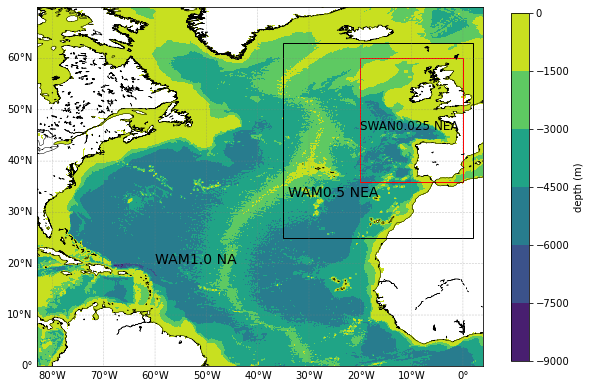

In [8]:
# Create a Basemap instance and define map parameters
m = Basemap(
    projection='cyl',
    llcrnrlat=0,
    urcrnrlat=70,
    llcrnrlon=-83,
    urcrnrlon=4,
    resolution='i'
)

# Create a figure and axes for the map
fig, ax = plt.subplots(figsize=(10, 8))

# Draw coastlines and countries
#m.drawcoastlines()
m.drawcoastlines(linewidth=0.5)
# Draw latitude and longitude tick marks
m.drawparallels(range(0, 70, 10), labels=[1, 0, 0, 0], fontsize=10, linewidth=0.5, color='gray', dashes=[1, 2])
m.drawmeridians(range(-180, 181, 10), labels=[0, 0, 0, 1], fontsize=10, linewidth=0.5, color='gray', dashes=[1, 2])

# Create a meshgrid for plotting
lon1, lat1 = np.meshgrid(lon,lat)
# Mask values above 0 in the 'ele' array
masked_ele = np.ma.masked_where(ele > 0, ele)

# Create the wind speed vector plot with masked data
plt.contourf(lon1, lat1, masked_ele, scale=100, cmap='viridis', angles='xy')
plt.colorbar(label='depth (m)',shrink=0.8,extend='min')

# Define coordinates for the square
lat1a, lat2a = 25, 63
lon1a, lon2a = -35, 2

# Convert square coordinates to map coordinates
x1, y1 = m(lon1a, lat1a)
x2, y2 = m(lon2a, lat2a)

# Plot the square on the map
square1 = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='black', linewidth=1)
ax.add_patch(square1)

# Define coordinates for the square
lat11, lat21 = 36, 60
lon11, lon21 = -20, 0

# Convert square coordinates to map coordinates
x11, y11 = m(lon11, lat11)
x21, y21 = m(lon21, lat21)

# Plot the square on the map
square2 = plt.Rectangle((x11, y11), x21 - x11, y21 - y11, fill=False, color='red', linewidth=1)
ax.add_patch(square2)

#buoy_lon, buoy_lat = -15.88, 53.07
#buoy_x, buoy_y = m(buoy_lon, buoy_lat)
#m.scatter(buoy_x, buoy_y, marker='X', color='blue', s=100)


text_lat, text_lon = 33, -34
text_x, text_y = m(text_lon, text_lat)
plt.text(text_x, text_y, 'WAM0.5 NEA', fontsize=14, color='black')

text_lat1, text_lon1 = 46, -20
text_x1, text_y1 = m(text_lon1, text_lat1)
plt.text(text_x1, text_y1, 'SWAN0.025 NEA', fontsize=12, color='black')

text_lat2, text_lon2 = 20, -60
text_x2, text_y2 = m(text_lon2, text_lat2)
plt.text(text_x2, text_y2, 'WAM1.0 NA', fontsize=14, color='black')

#text_lat3, text_lon3 = 54,-19
#text_x3, text_y3 = m(text_lon3, text_lat3)
#plt.text(text_x3, text_y3, 'M6 Bouy', fontsize=12, color='blue')

# Show the map with squares
#plt.show()
plt.savefig('/Users/ashlykalayiluthaman/Model/domain_bathy.png')